In [1]:
import tensortools as tt
import numpy as np
import preprocessing as pp
import utilities as u
import scipy as sp

% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [3]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]


In [11]:
VRDat,C, S, A = pp.load_scan_sess(sess)
#C = sp.stats.zscore(C,axis=0)
cmax = np.mean(C,axis=0)
print(cmax.shape)
C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)



C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1795,)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:256: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [5]:
import pickle
with open("G:\\My Drive\\2P_Data\\TwoTower\\4139219.2\\23_10_2018\\TwoTower_Timeout\\data.pkl",'wb') as f:
    pickle.dump({'C':C,'VRDat':VRDat,'C_trial_pos_N':C_trial_mat,'posbins':centers,'trial_info':trial_info},f)
    


In [13]:
print(C_trial_mat.shape)

(120, 45, 1795)


In [14]:
print(trial_info.keys())

dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick', 'omissions'])


In [15]:
mdl=tt.Ensemble(fit_method='ncp_hals',nonneg=True)

In [16]:
print(C_trial_mat.shape)

(120, 45, 1795)


In [ ]:
mdl.fit(C_trial_mat[:,:20,:].T, ranks=range(1, 20), replicates=5)


Fitting rank-1 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.03it/s]
                                                                                                                       

Rank-1 models:  min obj, 1.00;  max obj, 1.00;  time to fit, 2.1s



Fitting rank-2 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.20it/s]
                                                                                                                       

Rank-2 models:  min obj, 0.99;  max obj, 1.00;  time to fit, 4.1s



Fitting rank-3 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.63s/it]
                                                                                                                       

Rank-3 models:  min obj, 0.98;  max obj, 0.99;  time to fit, 7.3s



Fitting rank-4 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.60s/it]
                                                                                                                       

Rank-4 models:  min obj, 0.98;  max obj, 0.98;  time to fit, 12.5s



Fitting rank-5 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]
                                                                                                                       

Rank-5 models:  min obj, 0.98;  max obj, 0.98;  time to fit, 17.9s



Fitting rank-6 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.97s/it]
                                                                                                                       

Rank-6 models:  min obj, 0.98;  max obj, 0.98;  time to fit, 14.3s



Fitting rank-7 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.42s/it]
                                                                                                                       

Rank-7 models:  min obj, 0.98;  max obj, 0.98;  time to fit, 15.2s



Fitting rank-8 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.87s/it]
                                                                                                                       

Rank-8 models:  min obj, 0.97;  max obj, 0.98;  time to fit, 18.2s



Fitting rank-9 models: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.90s/it]
                                                                                                                       

Rank-9 models:  min obj, 0.97;  max obj, 0.98;  time to fit, 28.4s



Fitting rank-10 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.22s/it]
                                                                                                                       

Rank-10 models:  min obj, 0.97;  max obj, 0.98;  time to fit, 20.9s



Fitting rank-11 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.62s/it]
                                                                                                                       

Rank-11 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 24.4s



Fitting rank-12 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  6.20s/it]
                                                                                                                       

Rank-12 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 28.1s



Fitting rank-13 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.47s/it]
                                                                                                                       

Rank-13 models:  min obj, 0.97;  max obj, 0.98;  time to fit, 27.7s



Fitting rank-14 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.09s/it]
                                                                                                                       

Rank-14 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 25.0s



Fitting rank-15 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.08s/it]
                                                                                                                       

Rank-15 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 30.0s



Fitting rank-16 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  5.79s/it]
                                                                                                                       

Rank-16 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 29.6s



Fitting rank-17 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:29<00:00,  6.29s/it]
                                                                                                                       

Rank-17 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 29.2s



Fitting rank-18 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  8.64s/it]
                                                                                                                       

Rank-18 models:  min obj, 0.97;  max obj, 0.98;  time to fit, 39.1s



Fitting rank-19 models: 100%|████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.72s/it]
                                                                                                                       

Rank-19 models:  min obj, 0.97;  max obj, 0.97;  time to fit, 27.9s


C:\Users\mplitt\Anaconda3\lib\site-packages\tensortools\diagnostics.py:37: RuntimeWarning: invalid value encountered in true_divide
  unrm = [f / np.linalg.norm(f, axis=0) for f in U.factors]


In [ ]:
ax=tt.plot_objective(mdl)
ax.set_xlim([0,20])

In [ ]:
ax=tt.plot_similarity(mdl)
#ax.set_xlim([10,25])

In [ ]:
best_mdl=13

In [ ]:
# take rank 15 results, seems like parsimonious local minima
obj = mdl.objectives(best_mdl)
# get best model
mdl_hat = mdl.results[best_mdl][0]
# get factors from best model
U=mdl_hat.factors

In [ ]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],
                                scatter_kw={'c':trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter'],'cmap':'cool'})

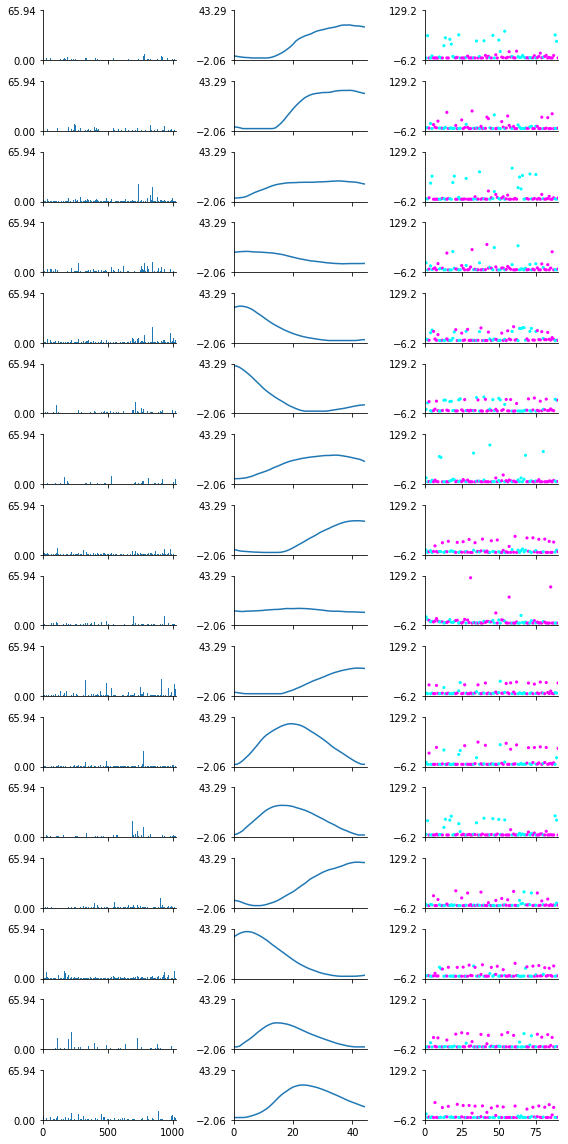

In [97]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],
                                scatter_kw={'c':trial_info['morphs']+trial_info['bckgndJitter']>.5,
                                            'cmap':'cool'}) #,
                                           #'s':-10*((trial_info['rewards']>0)-1)+3})

In [ ]:
print(trial_info.keys())